# Popular Data Science Questions: Stack Exchange



Via SEDE (Stack Exchange Data Explorer), we first examine which tables in the schema are useful for the question.

* **Posts**: contains most data about posts including each post's name, view count and upvotes etc.. Seems useful for general interpretation
* **Badges**: Badges are special lables awarded to questions or answers. e.g. 'Favourite Question', 'Famous Question'
* **Tags**: Users can tag their questions with relavant tags e.g. 'python', 'machine learning'. Counting tags by their number of appearances will be useful. 

By examining **Posts**, we can find which kinds of posts were most popular in 2019. Feeding the following query in SEDE gives:

SELECT PostTypeId, COUNT(*) as NrOfPosts  
  FROM posts  
  WHERE DATEPART(yy, CreationDate) = 2019  
  GROUP BY PostTypeId;  

|PostTypeID|NrOfPosts|
|----------|---------|
|1         |7948     |
|2         |7763     |
|4         |91       |
|5         |91       |
|6         |8        |


PostTypeID: 1 = Question, 2 = Answers

Most posts are overwhelmingly posts/answers. For the sake of our question of interest, we will only look at question posts.


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange
import seaborn as sns

%matplotlib inline

questions_2019 = pd.read_csv("2019_questions.csv", parse_dates = ['CreationDate'])
questions_2019.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [68]:
questions_2019.describe()

,Id,Score,ViewCount,AnswerCount,FavoriteCount
count,8839.000000,8839.000000,8839.000000,8839.000000,1407.000000
mean,54724.172870,0.870687,171.548026,0.787985,1.184790
std,6507.618509,1.410255,772.813626,0.851146,0.982766
min,43363.000000,-2.000000,2.000000,0.000000,0.000000
25%,48917.500000,0.000000,22.000000,0.000000,1.000000
50%,54833.000000,1.000000,40.000000,1.000000,1.000000
75%,60674.500000,1.000000,98.000000,1.000000,1.000000
max,65675.000000,45.000000,33203.000000,9.000000,16.000000


In [69]:
questions_2019["FavoriteCount"].value_counts(dropna=False)

NaN      7432
 1.0      953
 2.0      205
 0.0      175
 3.0       43
 4.0       12
 5.0        8
 6.0        4
 7.0        4
 11.0       1
 8.0        1
 16.0       1
Name: FavoriteCount, dtype: int64

The **FavouriteCount** column has 7432 missing values. I'll fill them with 0s.

In [70]:
questions_2019["FavoriteCount"].fillna(0, inplace=True)
questions_2019.describe()

,Id,Score,ViewCount,AnswerCount,FavoriteCount
count,8839.000000,8839.000000,8839.000000,8839.000000,8839.000000
mean,54724.172870,0.870687,171.548026,0.787985,0.188596
std,6507.618509,1.410255,772.813626,0.851146,0.584422
min,43363.000000,-2.000000,2.000000,0.000000,0.000000
25%,48917.500000,0.000000,22.000000,0.000000,0.000000
50%,54833.000000,1.000000,40.000000,1.000000,0.000000
75%,60674.500000,1.000000,98.000000,1.000000,0.000000
max,65675.000000,45.000000,33203.000000,9.000000,16.000000


We'll also transform **Tags** column so each row contains a list of attributed tags.

In [71]:
questions_2019 = pd.read_csv("2019_questions.csv", parse_dates = ['CreationDate'])


def tag_split(tags):
    tags_list = tags.split(",")
    return tags_list

questions_2019["Tags"] = questions_2019["Tags"].str.replace("<",""). \
                                                str.replace(">",",").str[:-1]



questions_2019["Tags"] = questions_2019["Tags"].apply(lambda tags: tags.split(","))


In [72]:
questions_2019.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,NaN
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,NaN
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,NaN
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,NaN
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,NaN


How many tags were each tags used and viewed?

In [73]:
tag_count_dict = {}
tag_view_dict = {}

def count_tags():
    tags = questions_2019["Tags"]
    
    for tag_list in tags:
        for tag in tag_list:
            if tag in tag_count_dict:
                tag_count_dict[tag] += 1
            else:
                tag_count_dict[tag] = 1

def count_views():
    for i in range(len(questions_2019)):
        tag_list = questions_2019["Tags"][i]
        for tag in tag_list:
            if tag in tag_view_dict:
                tag_view_dict[tag] += questions_2019["ViewCount"][i]
            else:
                tag_view_dict[tag] = questions_2019["ViewCount"][i]
                
count_tags()
count_views()

In [74]:
tag_count_dict

{'.net': 1,
 '3d-object-detection': 1,
 '3d-reconstruction': 9,
 'ab-test': 6,
 'accuracy': 89,
 'activation': 1,
 'activation-function': 44,
 'active-learning': 4,
 'activity-recognition': 5,
 'actor-critic': 21,
 'adaboost': 1,
 'aggregation': 12,
 'ai': 25,
 'alex-net': 5,
 'algorithms': 68,
 'allennlp': 2,
 'amazon-ml': 1,
 'anaconda': 20,
 'ann': 2,
 'annotation': 12,
 'anomaly': 4,
 'anomaly-detection': 92,
 'anonymization': 3,
 'anova': 2,
 'apache-hadoop': 13,
 'apache-nifi': 1,
 'apache-spark': 35,
 'arima': 11,
 'association-rules': 19,
 'attention-mechanism': 26,
 'auc': 3,
 'audio-recognition': 25,
 'autoencoder': 106,
 'automatic-summarization': 10,
 'automation': 4,
 'automl': 2,
 'aws': 20,
 'aws-lambda': 2,
 'azure-ml': 12,
 'backpropagation': 65,
 'batch-normalization': 29,
 'bayes-error': 1,
 'bayesian': 40,
 'bayesian-networks': 12,
 'bayesian-nonparametric': 2,
 'beginner': 27,
 'bert': 64,
 'bias': 19,
 'bigdata': 95,
 'binary': 26,
 'bioinformatics': 4,
 'books': 

In [75]:
tag_view_dict

{'.net': 438,
 '3d-object-detection': 7,
 '3d-reconstruction': 1129,
 'ab-test': 153,
 'accuracy': 15233,
 'activation': 15,
 'activation-function': 13121,
 'active-learning': 155,
 'activity-recognition': 126,
 'actor-critic': 1014,
 'adaboost': 23,
 'aggregation': 828,
 'ai': 3432,
 'alex-net': 208,
 'algorithms': 4581,
 'allennlp': 183,
 'amazon-ml': 35,
 'anaconda': 10476,
 'ann': 74,
 'annotation': 1043,
 'anomaly': 352,
 'anomaly-detection': 10992,
 'anonymization': 381,
 'anova': 70,
 'apache-hadoop': 466,
 'apache-nifi': 119,
 'apache-spark': 4598,
 'arima': 1004,
 'association-rules': 1022,
 'attention-mechanism': 15165,
 'auc': 67,
 'audio-recognition': 2195,
 'autoencoder': 15676,
 'automatic-summarization': 581,
 'automation': 142,
 'automl': 85,
 'aws': 1939,
 'aws-lambda': 992,
 'azure-ml': 694,
 'backpropagation': 9958,
 'batch-normalization': 4913,
 'bayes-error': 128,
 'bayesian': 3171,
 'bayesian-networks': 786,
 'bayesian-nonparametric': 29,
 'beginner': 2281,
 'bert

In [76]:
tag_count_df = pd.DataFrame.from_dict(tag_count_dict, orient="index").sort_values(by=0)
tag_view_df = pd.DataFrame.from_dict(tag_view_dict, orient="index").sort_values(by=0)

tag_count_top20 = tag_count_df[-20:]
tag_view_top20 = tag_view_df[-20:]

tags_top20 = pd.merge(tag_count_top20, tag_view_top20, how="left", left_index=True, right_index=True)
tags_top20.columns = ["Count", "ViewCount"]

In [77]:
tags_top20

,Count,ViewCount
machine-learning-model,224,NaN
statistics,234,NaN
clustering,257,33928.0
predictive-modeling,265,NaN
r,268,NaN
dataset,340,43151.0
regression,347,49451.0
pandas,354,201787.0
lstm,402,74458.0
time-series,466,64134.0


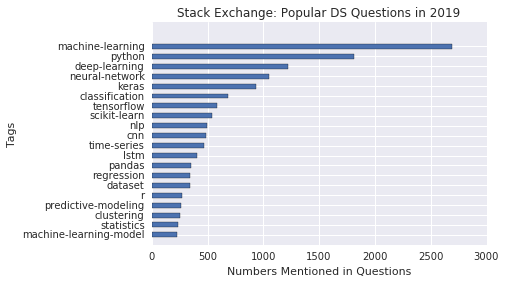

In [88]:
bar_widths = tags_top20["Count"]
bar_pos = arange(1,41, 2) + 0.5
tick_pos = arange(2, 42, 2)

figure, ax = plt.subplots()
ax.barh(bar_pos, bar_widths, 1)
ax.set_yticks(tick_pos)
ax.set_yticklabels(list(tags_top20.index))
ax.set_ylabel("Tags")
ax.set_xlabel("Numbers Mentioned in Questions")
ax.set_title("Stack Exchange: Popular DS Questions in 2019")

Deep learning a very hot subject in DS. However, is machine learning a subject of consistent interest? or just a fad?

Let's see how much it has been mentioned in the past as a whole.

In [79]:
all_questions = pd.read_csv("all_questions.csv", parse_dates = ["CreationDate"])

all_questions["Tags"] = all_questions["Tags"].str.replace("<",""). \
                                                str.replace(">",",").str[:-1]
all_questions["Tags"] = all_questions["Tags"].apply(lambda tag: tag.split(","))


### Divide Questions by their Quarter

In [80]:
def get_quarter(date):
    year = str(date.year)
    
    if date.month <= 3:
        quarter = "q1"
    elif date.month <= 6:
        quarter = "q2"
    elif date.month <= 9:
        quarter = "q3"
    else:
        quarter = "q4"
        
    return year + quarter

all_questions["Quarter"] = all_questions["CreationDate"].apply(get_quarter)

In [81]:
all_questions[9000:9010]

,Id,CreationDate,Tags,Quarter
9000,41385,2018-11-18 17:41:42,"[machine-learning, python, nlp, dataset, senti...",2018q4
9001,41386,2018-11-18 18:01:09,"[machine-learning, deep-learning, cnn, object-...",2018q4
9002,41398,2018-11-19 02:39:50,"[scikit-learn, random-forest, unbalanced-class...",2018q4
9003,41400,2018-11-19 06:09:30,"[machine-learning, python, random-forest, deci...",2018q4
9004,41407,2018-11-19 09:16:05,"[logistic-regression, naive-bayes-classifier, ...",2018q4
9005,41411,2018-11-19 10:20:15,"[recommender-system, apache-spark, pyspark, co...",2018q4
9006,41412,2018-11-19 11:29:37,[distance],2018q4
9007,41415,2018-11-19 13:06:56,"[pandas, visualization]",2018q4
9008,41417,2018-11-19 13:39:07,"[scikit-learn, decision-trees]",2018q4
9009,41419,2018-11-19 14:54:18,"[neural-network, classification, r, time-series]",2018q4


In [82]:
## deep learning tags in TOP20 tags
deep_learning = ["deep-learning", "neural-network", "keras", "classification", "tensorflow", "nlp", "cnn", "lstm"]

## is the question a deep learning related question?
def is_deeplearning(tag_list):
    dl = False
    for tag in tag_list:
        if tag in deep_learning:
            dl = True
    
    return dl
all_questions["DeepLearning"] = all_questions["Tags"].apply(is_deeplearning)

all_questions.head()

,Id,CreationDate,Tags,Quarter,DeepLearning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",2019q1,True
1,45418,2019-02-12 00:50:39,[neural-network],2019q1,True
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",2019q1,False
3,45426,2019-02-12 04:51:49,[keras],2019q1,True
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",2019q1,False


In [83]:
dl_count_quarterly = all_questions[["Quarter","DeepLearning"]].groupby(["Quarter"]).sum()
dl_count_quarterly

,DeepLearning
Quarter,
2014q2,29.0
2014q3,46.0
2014q4,58.0
2015q1,34.0
2015q2,74.0
2015q3,83.0
2015q4,96.0
2016q1,152.0
2016q2,148.0


In [84]:
total_count_quarterly = all_questions[["Id", "Quarter"]].groupby(["Quarter"]).count()
total_count_quarterly.columns = ["TotalQuestions"]
total_count_quarterly

,TotalQuestions
Quarter,
2014q2,157
2014q3,189
2014q4,216
2015q1,190
2015q2,284
2015q3,311
2015q4,382
2016q1,516
2016q2,518


In [117]:
dl_stats = pd.merge(dl_count_quarterly, total_count_quarterly, left_index = True, right_index = True)
dl_stats["Percentage"] = dl_stats["DeepLearning"] / dl_stats["TotalQuestions"]
dl_stats["Quarter"] = dl_stats.index

dl_stats.reset_index(drop=True, inplace=True)
dl_stats

,DeepLearning,TotalQuestions,Percentage,Quarter
0,29.0,157,0.184713,2014q2
1,46.0,189,0.243386,2014q3
2,58.0,216,0.268519,2014q4
3,34.0,190,0.178947,2015q1
4,74.0,284,0.260563,2015q2
5,83.0,311,0.266881,2015q3
6,96.0,382,0.251309,2015q4
7,152.0,516,0.294574,2016q1
8,148.0,518,0.285714,2016q2
9,182.0,585,0.311111,2016q3


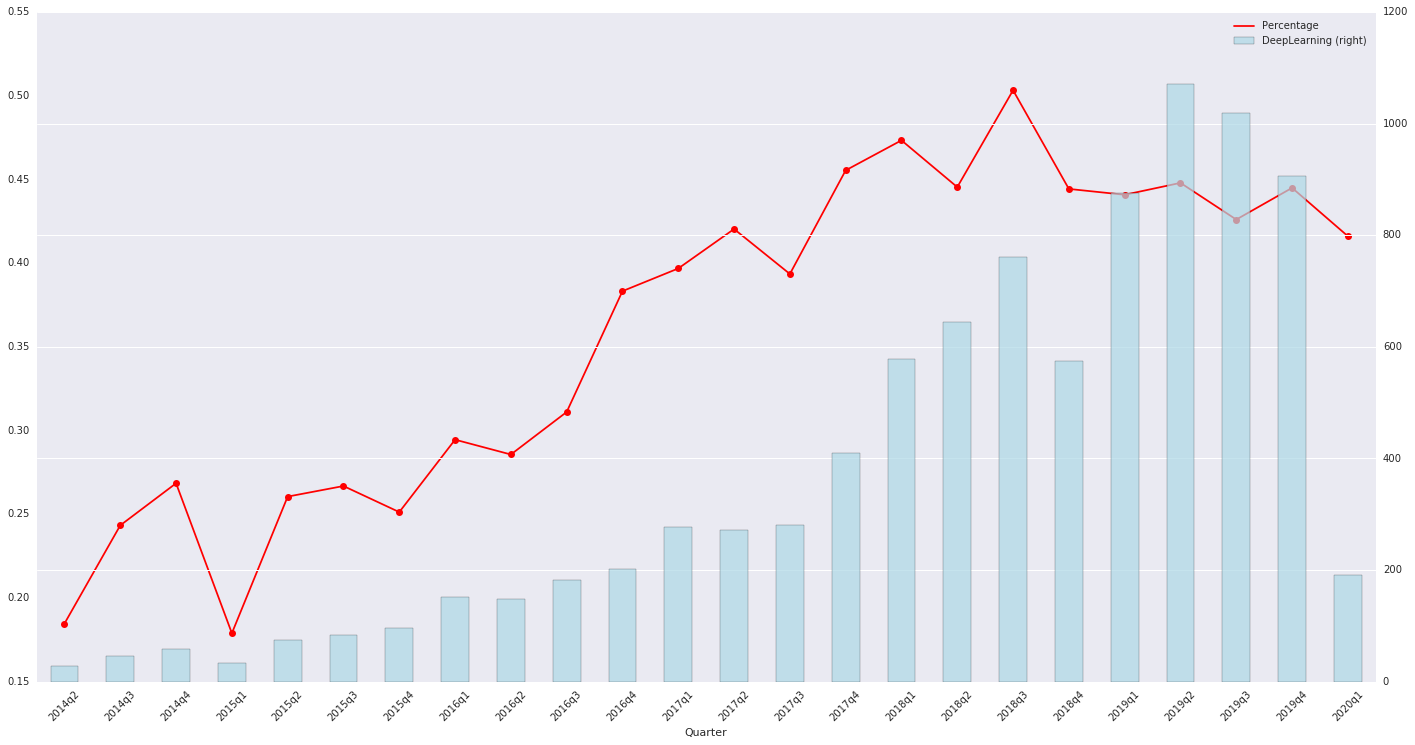

In [143]:
ax1 = dl_stats.plot(x = "Quarter", y="Percentage", kind = "line", linestyle = "-", marker = "o", color = "red", figsize=(24,12))

ax2 = dl_stats.plot(x = "Quarter", y = "DeepLearning", ax = ax1, secondary_y = True, alpha = 0.7, rot = 45, kind = "bar", color = "lightblue")